In [14]:
using Plots
using DataFrames
using CSV
import MultivariateStats

## Load data



In [2]:
webthings = DataFrame(CSV.File("./tree-sitter-analyzer/outputs/web-things.csv"))
jupyterthings = DataFrame(CSV.File("./tree-sitter-analyzer/outputs/jupyter-only-things.csv"))
datasciencethings = DataFrame(CSV.File("./tree-sitter-analyzer/outputs/data-science-things.csv"))
webthings.kind .= "web"
jupyterthings.kind .= "jupyter"
datasciencethings.kind .= "data-science"
()

()

(17, 26)
(17, 26)


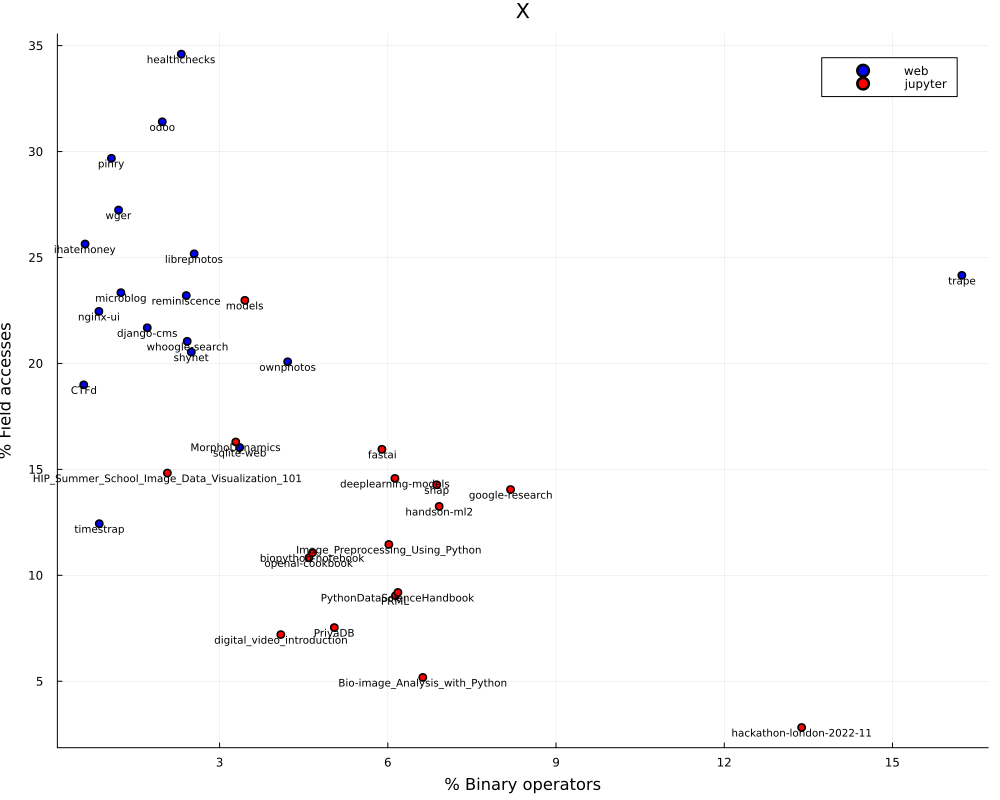

In [65]:
allthings = vcat(webthings, jupyterthings)

projects = allthings[allthings.type .== "dir-total" .&& allthings.statements_total .> 10, :]

pl = plot()
for kind in unique(projects.kind)
	df = projects[projects.kind .== kind, :]
	println(size(df))
	scatter!(pl,
		df.binary_operators_total ./ df.expressions_total .* 100,
		df.field_accesses_total ./ df.expressions_total .* 100,
		series_annotations = text.(replace.(df.dir, r".*/(?=.)" => ""), 7, :top),
		# color = color,
		title = "X",
		size = (1000, 800),
		xaxis = ("% Binary operators",),
		yaxis = ("% Field accesses",),
		label = kind,
        color = ifelse(kind == "web", :blue, :red)
	)
end
savefig(pl, "binary-vs-field-scatter-labels.png")
pl


In [27]:
proj_names = projects[:, [:kind, :dir, :statements_total]]
proj_stats = projects[:, [
        :binary_operators_total,
        :field_accesses_total,
        :conditions_total,
        :chained_calls_total,
        :class_defs_total,
        :decorators_total,
        :field_assignments_total,
        :function_defs_total,
        :indexing_total,
        :invocations_total,
        :lambda_functions_total,
        :literals_total,
        :loops_total,
        :nested_functions_total,
        :slicing_total,
        :try_catches_total,
        :type_annotations_total,
        :variable_assignments_total,
]] ./ projects.expressions_total .* 100
hcat(proj_names, proj_stats)

Row,kind,dir,statements_total,binary_operators_total,field_accesses_total,conditions_total,chained_calls_total,class_defs_total,decorators_total,field_assignments_total,function_defs_total,indexing_total,invocations_total,lambda_functions_total,literals_total,loops_total,nested_functions_total,slicing_total,try_catches_total,type_annotations_total,variable_assignments_total
,String,String,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,web,https://github.com/CTFd/CTFd,14626,0.576764,18.9918,4.2604,2.62571,0.927283,2.0362,0.777516,4.05328,4.31139,41.6895,0.0573577,51.2714,0.892231,0.159327,0.0318654,0.283602,0.286789,15.7256
2,web,https://github.com/LibrePhotos/librephotos,3999,2.54612,25.1754,5.45596,3.52473,2.26033,0.415692,2.60674,4.51199,4.90171,38.1917,0.103923,36.9533,1.84463,0.0433013,0.207846,0.736122,1.19512,11.2497
3,web,https://github.com/benbusby/whoogle-search,1322,2.42265,21.045,7.79335,1.51781,0.20432,0.904845,2.48103,3.67776,10.5954,28.634,0.0291886,44.5709,2.83129,0.116754,0.467017,0.525394,3.70695,12.3468
4,web,https://github.com/coleifer/sqlite-web,413,3.35861,16.0347,10.4009,1.40845,0.216685,4.65872,0.650054,6.17551,4.98375,38.8949,0.108342,47.0206,1.73348,0.325027,0.433369,0.866739,0.0,17.2264
5,web,https://github.com/django-cms/django-cms,25916,1.71017,21.6847,4.17288,2.16949,1.15593,0.59322,2.06102,5.04746,4.6,41.9881,0.0355932,39.1966,1.30847,0.0864407,0.0966102,0.349153,0.0,16.7475
6,web,https://github.com/healthchecks/healthchecks,13320,2.31629,34.6019,2.71602,0.876136,1.3498,2.08082,4.71745,5.84273,3.5374,33.6847,0.0164276,45.4277,0.509254,0.0465447,0.0958274,0.240937,0.791261,9.96879
7,web,https://github.com/hooram/ownphotos,3454,4.21373,20.0804,4.39835,4.21373,2.13944,1.05343,2.096,4.10513,7.58036,38.6403,0.119461,34.3397,2.74761,0.0651607,0.466985,0.695048,0.0,14.4657
8,web,https://github.com/jofpin/trape,1656,16.2371,24.158,6.47225,0.733772,0.827846,0.809031,3.31138,4.15804,12.286,21.0913,0.056444,42.9539,0.790216,0.0752587,0.470367,0.451552,0.0,10.047
9,web,https://github.com/kanishka-linux/reminiscence,3061,2.40555,23.2065,12.7069,0.948068,0.877317,0.863167,2.90081,2.43385,2.3348,32.39,0.0566011,38.0784,1.25937,0.0,0.268855,0.283006,0.0,19.7538


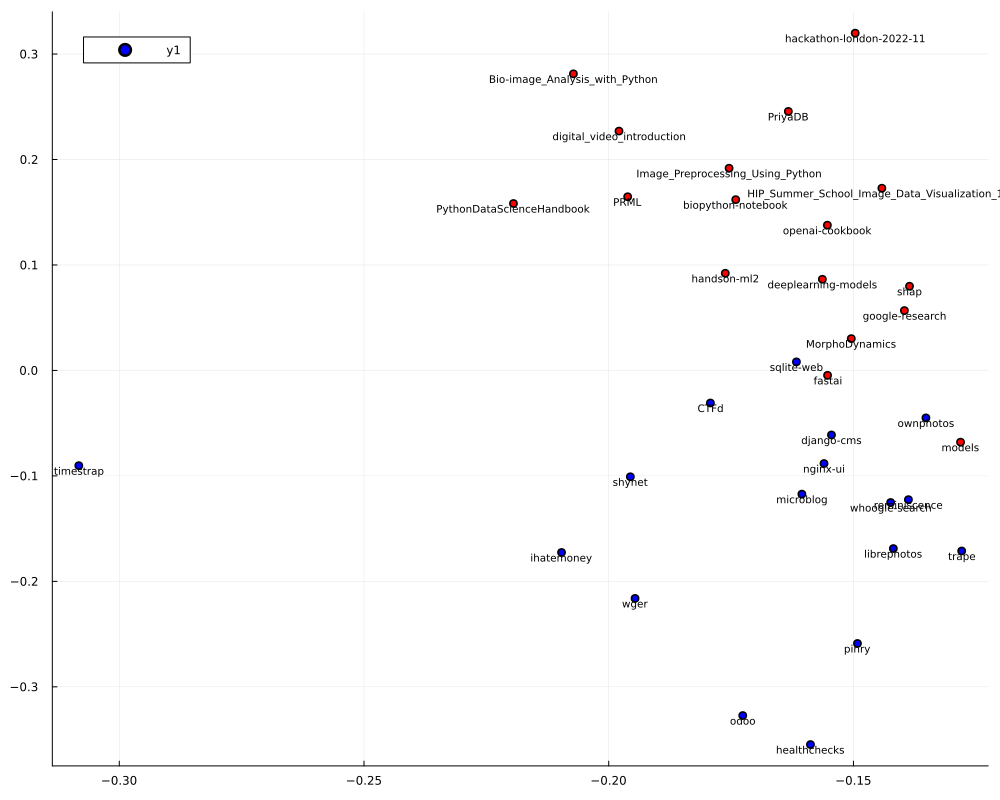

In [69]:
pcaModel = MultivariateStats.fit(MultivariateStats.PCA, Matrix(proj_stats))

pcaMatrix = MultivariateStats.projection(pcaModel)

pl = scatter(
    pcaMatrix[:, 1],
    # pcaMatrix[:, 2],
    pcaMatrix[:, 3],
    series_annotations = text.(replace.(proj_names.dir, r".*/(?=.)" => ""), 7, :top),
    color = ifelse.(proj_names.kind .== "web", :blue, :red),
    size = (1000, 800)
)
savefig(pl, "pca-split-labels.png")
pl

In [5]:
allthings[allthings.ERROR_total .> allthings.statements_total, :]

Row,type,dir,file,lang,ERROR_total,binary_operators_total,chained_calls_total,class_defs_total,conditions_total,decorators_total,expressions_total,field_accesses_total,field_assignments_total,function_defs_total,indexing_total,invocations_total,lambda_functions_total,literals_total,loops_total,nested_functions_total,slicing_total,statements_total,try_catches_total,type_annotations_total,variable_assignments_total,kind
,String15,String,String,String7,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String
1,file,https://github.com/fastai/fastai,fastai-fastai-dedec6b/nbs/65_medical.text.ipynb.py,python,4,3,0,0,0,0,6,0,0,0,0,1,0,0,0,0,0,2,0,0,0,jupyter
2,file,https://github.com/fastai/fastai,fastai-fastai-dedec6b/nbs/74_huggingface.ipynb.py,python,4,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,jupyter
3,file,https://github.com/fastai/fastai,fastai-fastai-dedec6b/nbs/dev-setup.ipynb.py,python,31,23,0,0,0,0,36,4,0,0,1,0,0,2,0,0,0,23,0,0,2,jupyter
4,file,https://github.com/fastai/fastai,fastai-fastai-dedec6b/nbs/index.ipynb.py,python,4,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,jupyter
5,file,https://github.com/fastai/fastai,fastai-fastai-dedec6b/nbs/tutorial.ipynb.py,python,4,3,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,jupyter
6,file,https://github.com/google-research/google-research,google-research-google-research-3a4c630/representation_clustering/Analyze_clusters.ipynb.python,python,123,89,40,0,12,0,1178,99,0,0,187,538,0,489,36,0,10,83,0,0,36,jupyter
7,file,https://github.com/google-research/google-research,google-research-google-research-3a4c630/scrna_benchmark/Generate Tabula Muris.ipynb.r,python,70,12,2,0,0,0,159,21,0,0,8,59,0,62,0,0,0,40,0,0,0,jupyter
8,file,https://github.com/google-research/google-research,google-research-google-research-3a4c630/simulation_research/next_day_wildfire_spread/data_export/dataset_demo.ipynb.py,python,68,13,13,0,2,0,219,47,0,2,19,65,2,153,4,0,12,21,0,11,12,jupyter
9,file,https://github.com/tensorflow/models,tensorflow-models-ef1c3fd/official/projects/waste_identification_ml/pre_processing/coco_to_tfrecord.ipynb.python,python,21,27,0,0,0,0,64,9,0,0,0,5,0,14,0,0,0,19,1,1,7,jupyter
